# Project: Investigate a Medical Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
print("Rows:  ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:   110527
Columns:  14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
for  feature  in  ["Diabetes", "Alcoholism", "Hipertension", "Handcap",
                "Scholarship", "SMS_received", "Neighbourhood"]:
    print("{}: {}".format(feature, df[feature].unique()))

Diabetes: [0 1]
Alcoholism: [0 1]
Hipertension: [1 0]
Handcap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO' 'DO MOSCOSO'
 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA' 'ILHA DO FRADE'
 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO' 'BOA VISTA'
 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA' 'BARRO VERMELHO'
 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'

In [7]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

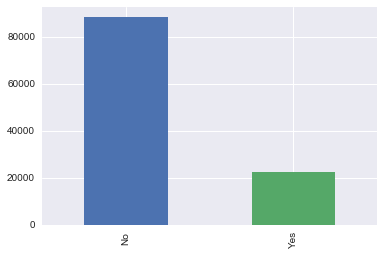

In [10]:
df['No-show'].value_counts().plot(kind='bar')

# Data Cleaning

In [11]:
# Checking 'Age' entires for outliers
print ("Age range:", sorted(df['Age'].unique()))

Age range: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


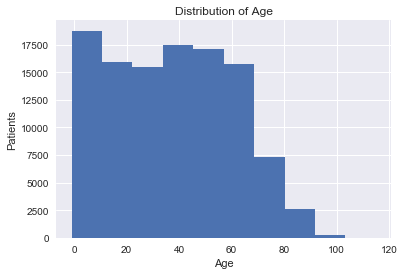

In [12]:
# Distribution of 'Age'
plt.figure.Figure();
age_hist = df['Age'].plot.hist(bins=10)
age_hist.set_xlabel("Age")
age_hist.set_ylabel("Patients")
age_hist.set_title('Distribution of Age')

In [13]:
# remove age outliers
df = df[(df.Age >= 0) & (df.Age <= 95)]
df.shape

(110480, 14)

In [14]:
min_age = df['Age'].min()
max_age = df['Age'].max()
print ("Age now spans: {} to {}.".format(min_age, max_age))

Age now spans: 0 to 95.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110480 non-null float64
AppointmentID     110480 non-null int64
Gender            110480 non-null object
ScheduledDay      110480 non-null object
AppointmentDay    110480 non-null object
Age               110480 non-null int64
Neighbourhood     110480 non-null object
Scholarship       110480 non-null int64
Hipertension      110480 non-null int64
Diabetes          110480 non-null int64
Alcoholism        110480 non-null int64
Handcap           110480 non-null int64
SMS_received      110480 non-null int64
No-show           110480 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


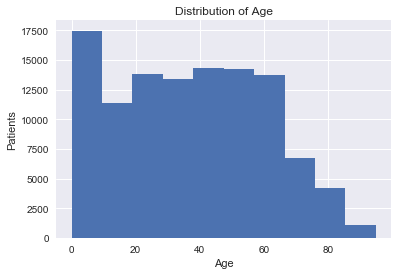

In [16]:
# Distribution of 'Age'
plt.figure.Figure();
age_hist = df['Age'].plot.hist(bins=10)
age_hist.set_xlabel("Age")
age_hist.set_ylabel("Patients")
age_hist.set_title('Distribution of Age');

In [17]:
#df.columns = map(str.lower, df.columns)
df.columns = [x.lower() for x in df.columns]

In [18]:
df.columns = [x.strip().replace('-', '_') for x in df.columns]

In [19]:
# Renaming columns to fix typos, inconsistency and spelling mistakes
df.rename(columns={'appointmentid' :'appointment_id',
                   'handcap' :'handicap', 
                   'patientid' : 'patient_id',
                   'appointmentid' : 'appointment_id',
                   'scheduledday' : 'scheduled_day',
                   'appointmentday' : 'appointment_day',
                   'neighbourhood' : 'neighborhood',
                   'no_show' : 'attendance',
                   'hipertension':'hypertension'}, 
          inplace=True
         )

In [20]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attendance
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Manage yes/no entries

In [21]:
#Replace 'M' and 'F' with 1 and 0 for 'Gender' 
#Replace 'Yes' and 'No' with 1 and 0 for 'No-show'
  #0 = Showed up to appointment 
  #1 = did not show up to appointment (miis it)

In [22]:
#df['gender'] = df['gender'].map({'M':1,'F':0})
#df['attendance'] = df['attendance'].map({'Yes':1,'No':0})

In [23]:
df['attendance'].replace({'No':0,'Yes':1},inplace=True)

In [24]:
df['gender'].replace({'M':0,'F':1},inplace=True)

### convert to datetime;  add: weekday, total_missed

In [25]:
df.appointment_day = df.appointment_day.apply(np.datetime64)
df.scheduled_day   = df.scheduled_day.apply(np.datetime64)

In [26]:
df['week_day'] = pd.to_datetime(df['appointment_day']).apply(lambda x: x.isoweekday())

<a id='eda'></a>
## Exploratory Data Analysis


In [27]:
attending = df.attendance == 0
absent = df.attendance == 1

In [28]:
attending.head()

0    True
1    True
2    True
3    True
4    True
Name: attendance, dtype: bool

In [ ]:
attending['age'].describe()

#https://stackoverflow.com/questions/42832675/setting-axis-labels-for-histogram-pandas
#https://stackoverflow.com/questions/42390668/how-do-i-set-x-and-y-axis-labels-for-pandas-histograms

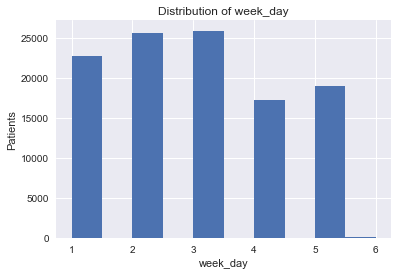

In [29]:
# Distribution of 'week_day'
plt.figure.Figure();
age_hist = df['week_day'].plot.hist(bins=10)
age_hist.set_xlabel("week_day")
age_hist.set_ylabel("Patients")
age_hist.set_title('Distribution of week_day');

In [30]:
df['total_missed'] = df.groupby('patient_id')['attendance'].apply(lambda x: x.cumsum())

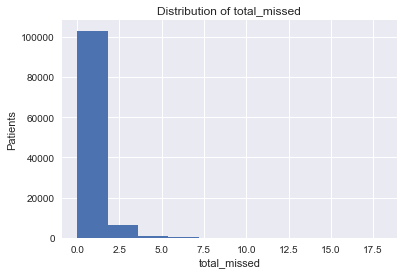

In [31]:
# Distribution of 'total_missed'
plt.figure.Figure();
age_hist = df['total_missed'].plot.hist(bins=10)
age_hist.set_xlabel("total_missed")
age_hist.set_ylabel("Patients")
age_hist.set_title('Distribution of total_missed')

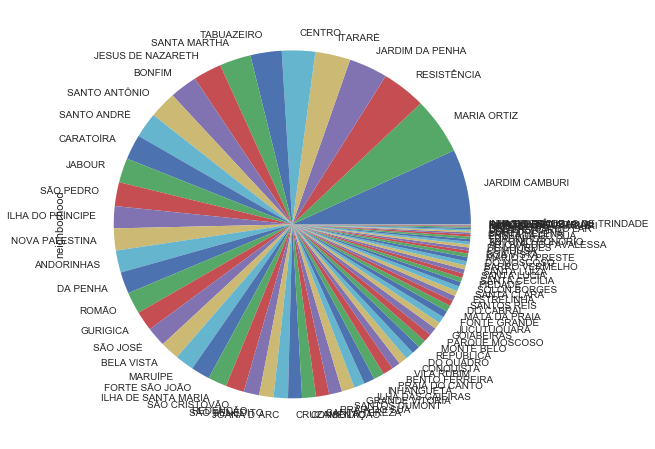

In [32]:
df['neighborhood'].value_counts().plot(kind='pie', figsize=(8,8));

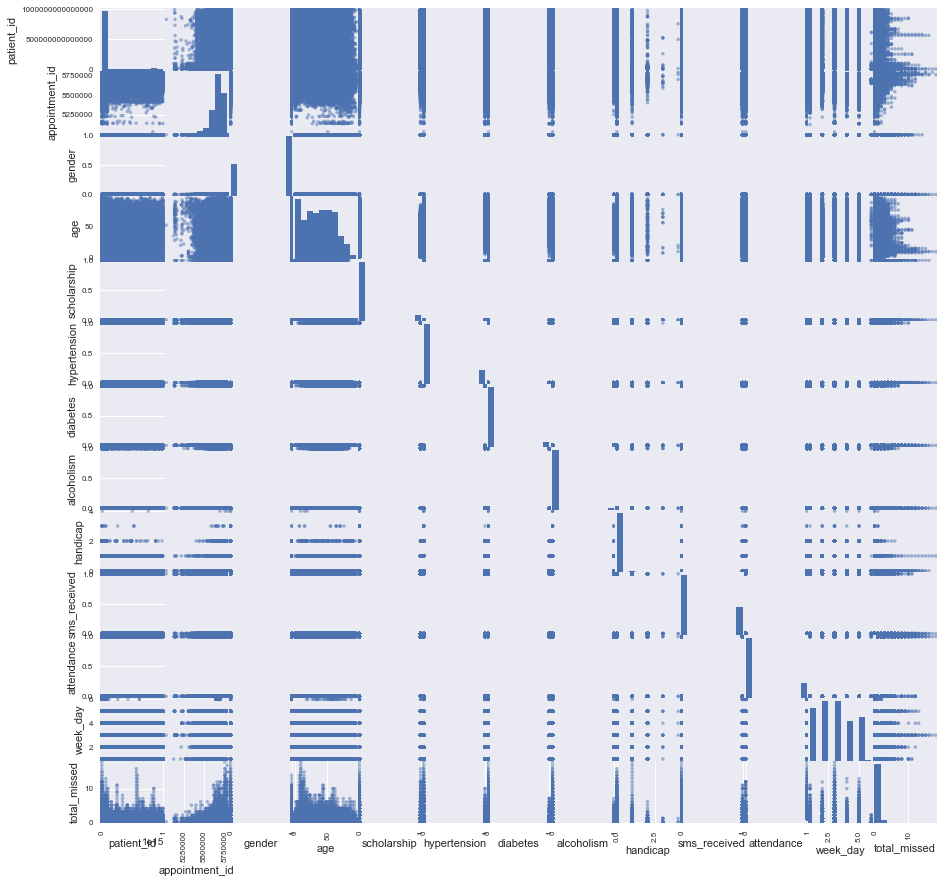

In [33]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

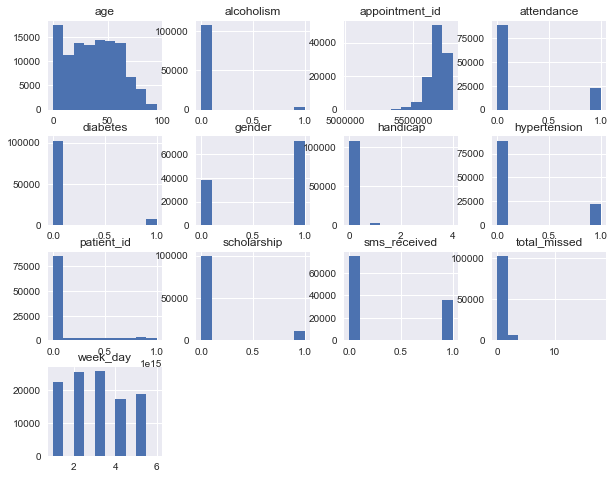

In [34]:
df.hist(figsize=(10,8));

### Research Question 1: Age

In [35]:
df.plot(x='patient_id', 'y=age', kind='scatter');

SyntaxError: positional argument follows keyword argument (<ipython-input-35-c23532cc5912>, line 1)

In [ ]:
df['age'].plot(kind='box');

In [ ]:
df.groupby('age').attendance.mean().plot(kind='bar')

In [ ]:
df.age[absent].mean()

In [ ]:
df.age[absent].hist(label='absent')

In [ ]:
df.groupby('age').absent.mean().plot(kind='bar')

In [ ]:
#histo_noshow = df.groupby('noshow').hist(column='diabetes', sharex=True, sharey=True)
#pl.title("Histogram of No-shows")
#pl.xlabel("noshow")
#pl.ylabel("PatientId")

frame = pd.DataFrame([np.random.rand(20), np.sign(np.random.rand(20) - 0.5)]).T
frame.columns = ['age', 'absent']

# Note that you can let the hist function do the groupby
# the function hist returns the list of axes created
axarr = frame.hist(column='age', by = 'absent', sharex=True, sharey=True, layout = (2, 1))

for ax in axarr.flatten():
    ax.set_xlabel("age")
    ax.set_ylabel("patientid")

In [ ]:
df.age[absent].hist(alpha=0.5, label='absent')
df.age[attending].hist(alpha=0.5, label='attending');
plt.legend();

In [ ]:
df.age[absent].hist(alpha=0.5, bins = 20, label='absent')
df.age[attending].hist(alpha=0.5, bins = 20, label='attending');

In [ ]:
# Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2: Diabetes

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

In [ ]:
df.diabetes[noshow].mean()

In [ ]:
df.groupby('diabetes').attendance.mean().plot(kind='bar')

### Research Question 3: Day of the week

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [ ]:
df.week_day[absent].hist(alpha=0.5, bins = 20, label='absent')
df.week_day[attending].hist(alpha=0.5, bins = 20, label='attending');

<a id='conclusions'></a>
## Conclusions

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])